# IPL EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Ipl_df = pd.read_excel('dataset/IPL_dataset.xlsm')

In [3]:
Ipl_df.shape

(133, 14)

In [4]:
Ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Jersey No      133 non-null    int64  
 1   Player         133 non-null    object 
 2   Matches        133 non-null    int64  
 3   Inns           133 non-null    int64  
 4   Not Out        133 non-null    int64  
 5   Runs           133 non-null    int64  
 6   Highest Score  133 non-null    object 
 7   Avg            133 non-null    float64
 8   Balls faced    133 non-null    int64  
 9   Strike rate    133 non-null    float64
 10  100            133 non-null    int64  
 11  50             133 non-null    int64  
 12  4s             133 non-null    int64  
 13  6s             133 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 14.7+ KB


In [5]:
Ipl_df.head(5)

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


In [6]:
Ipl_df.rename(columns={50:'50s',100:'100s'},inplace=True)

## Q1. What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played.

In [7]:
Ipl_df[Ipl_df['Matches']==Ipl_df['Matches'].max()][['Player','Matches']].reset_index(drop=True)

,Player,Matches
0,Shikhar Dhawan,17
1,Shreyas Iyer,17
2,Marcus Stoinis,17
3,Kagiso Rabada,17


### Q2. Top 2 players with maximum Average who have scored atleast 2 half centuries ?

In [8]:
Ipl_df[Ipl_df['50s']>=2].sort_values(by='Avg',ascending=False).head(2)

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100s,50s,4s,6s
36,37,Wriddhiman Saha,4,4,1,214,87,71.33,153,139.86,0,2,24,5
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


### Q3. Create 2 new columns based on Player name. First column will have first name and second column will have last name. Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name

In [9]:
Ipl_df[['Player_FirstName','Player_SecondName']] = Ipl_df['Player'].str.split(' ',n=1,expand=True)

In [10]:
Ipl_df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100s,50s,4s,6s,Player_FirstName,Player_SecondName
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,David,Warner
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,Shreyas,Iyer
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0,Khaleel,Ahmed
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0,Arshdeep,Singh
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0,Daniel,Sams
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0,Shreevats,Goswami


### Q4. Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.

In [11]:
Ipl_df['Cleaned_Highest_score'] = Ipl_df['Highest Score'].str.replace('*', '', regex=False)


In [12]:
Ipl_df['Cleaned_Highest_score'].fillna(Ipl_df[Ipl_df['Cleaned_Highest_score'].isna()]['Highest Score'],inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17128\750725501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ipl_df['Cleaned_Highest_score'].fillna(Ipl_df[Ipl_df['Cleaned_Highest_score'].isna()]['Highest Score'],inplace=True)


In [13]:
Ipl_df['Cleaned_Highest_score'].astype(int)

0      132
1      106
2       85
3       88
4       99
      ... 
128      0
129      0
130      0
131      0
132      0
Name: Cleaned_Highest_score, Length: 133, dtype: int32

In [14]:
Ipl_df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100s,50s,4s,6s,Player_FirstName,Player_SecondName,Cleaned_Highest_score
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul,132
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,106
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,David,Warner,85
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,Shreyas,Iyer,88
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0,Khaleel,Ahmed,0
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0,Arshdeep,Singh,0
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0,Daniel,Sams,0
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0,Shreevats,Goswami,0


### Q5. Print the total number of centuries scored in the entire season.

In [15]:
Ipl_df['100s'].agg("sum")

5

### Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season. Print the player name, his strike rate and average strike rate.

In [16]:
Ipl_df['avg_strike_Rate'] = round(Ipl_df['Strike rate'].agg("mean"),2)


In [17]:
Ipl_df[Ipl_df['Strike rate']<=round(Ipl_df['Strike rate'].agg("mean"),2)][['Player','Strike rate','avg_strike_Rate']]

,Player,Strike rate,avg_strike_Rate
51,Ajinkya Rahane,105.60,107.36
55,Glenn Maxwell,101.88,107.36
58,Vijay Shankar,101.04,107.36
61,Josh Philippe,101.29,107.36
62,Gurkeerat Singh,88.75,107.36
65,Kedar Jadhav,93.93,107.36
70,Yashasvi Jaiswal,90.90,107.36
71,Shreyas Gopal,94.87,107.36
77,Murali Vijay,74.41,107.36
79,Chris Jordan,93.54,107.36


### Q7. Please check the correlation between the features and create a heat map.

In [18]:
selected_cols = Ipl_df[['Matches','Inns','Not Out','Runs','Cleaned_Highest_score','Avg','Balls faced','Strike rate','100s','50s','4s','6s']]

In [19]:
selected_cols.corr()

,Matches,Inns,Not Out,Runs,Cleaned_Highest_score,Avg,Balls faced,Strike rate,100s,50s,4s,6s
Matches,1.000000,0.728358,0.555261,0.565237,0.456171,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367
Inns,0.728358,1.000000,0.464356,0.895914,0.832002,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922
Not Out,0.555261,0.464356,1.000000,0.308747,0.235613,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472
Runs,0.565237,0.895914,0.308747,1.000000,0.913250,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166
Cleaned_Highest_score,0.456171,0.832002,0.235613,0.913250,1.000000,0.774646,0.904798,0.608398,0.383540,0.841283,0.875322,0.812893
Avg,0.306128,0.585148,0.429888,0.687475,0.774646,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224
Balls faced,0.555102,0.889753,0.271021,0.989948,0.904798,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916
Strike rate,0.371328,0.581468,0.415060,0.517678,0.608398,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317
100s,0.128405,0.224328,0.019726,0.382577,0.383540,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767
50s,0.455437,0.755027,0.174184,0.912264,0.841283,0.638326,0.900547,0.406029,0.292812,1.000000,0.892025,0.757501


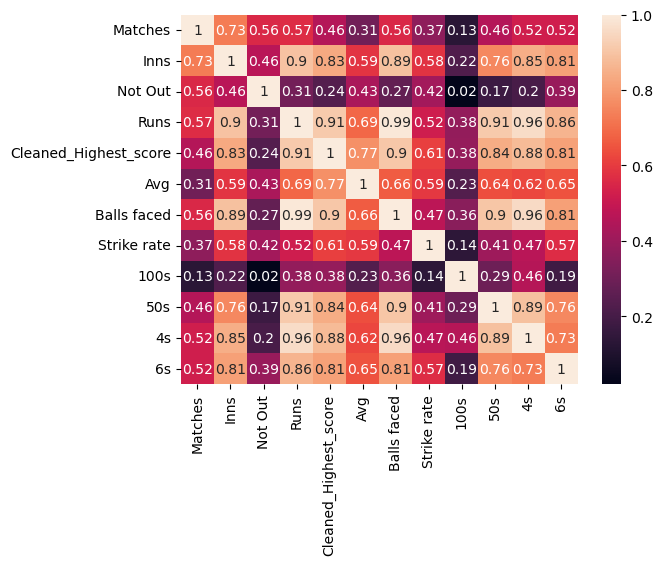

In [20]:
sns.heatmap(selected_cols.corr(),cbar=True,annot=True)
plt.show()

### Q8. Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.

In [21]:
Ipl_df[(Ipl_df['Avg']> 50) & (Ipl_df['Strike rate']>120)][['Player','Avg','Strike rate']]

,Player,Avg,Strike rate
0,KL Rahul,55.83,129.34
4,Ishan Kishan,57.33,145.76
31,Kieron Pollard,53.60,191.42
36,Wriddhiman Saha,71.33,139.86
37,Ruturaj Gaikwad,51.00,120.71
57,Deepak Hooda,101.00,142.25
60,Tom Curran,83.00,133.87


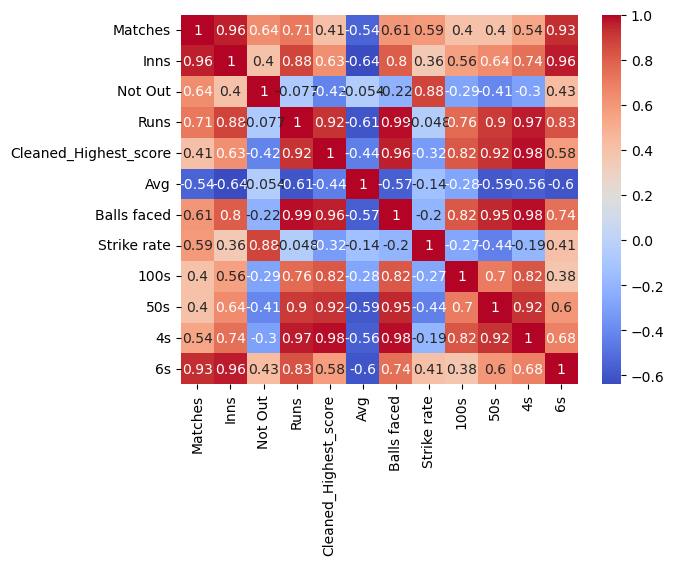

In [22]:
correlation_matrix = Ipl_df[(Ipl_df['Avg']> 50) & (Ipl_df['Strike rate']>120)][['Matches', 'Inns', 'Not Out', 'Runs', 'Cleaned_Highest_score', 
                                  'Avg', 'Balls faced', 'Strike rate', '100s', '50s', '4s', '6s']].corr()

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

### Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.

In [23]:
Ipl_df[(Ipl_df['Avg']> 40) & (Ipl_df['Balls faced']>100)][['Player','Avg','Balls faced']]

,Player,Avg,Balls faced
0,KL Rahul,55.83,518
1,Shikhar Dhawan,44.14,427
4,Ishan Kishan,57.33,354
8,Virat Kohli,42.36,384
9,ABD Villiers,45.40,286
10,Faf Duplessis,40.81,319
14,Eoin Morgan,41.80,302
24,Kane Williamson,45.28,237
27,Chris Gayle,41.14,210
28,Ben Stokes,40.71,200


### Q10. Players who scored atleast one century in this season. Create visualization.

In [24]:
century_data = Ipl_df[(Ipl_df['100s']> 0)]
century_data

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100s,50s,4s,6s,Player_FirstName,Player_SecondName,Cleaned_Highest_score,avg_strike_Rate
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,KL,Rahul,132,107.36
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,106,107.36
13,14,Mayank Agarwal,11,11,0,424,106,38.54,271,156.45,1,2,44,15,Mayank,Agarwal,106,107.36
28,29,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7,Ben,Stokes,107,107.36


In [99]:
century_data_drop = century_data.drop(['Jersey No','Player','Player_FirstName','Player_SecondName','Highest Score'],axis=1)
century_data_drop = century_data_drop.reset_index(drop=True)


In [100]:
century_data_drop['Cleaned_Highest_score']=century_data_drop['Cleaned_Highest_score'].astype(int)

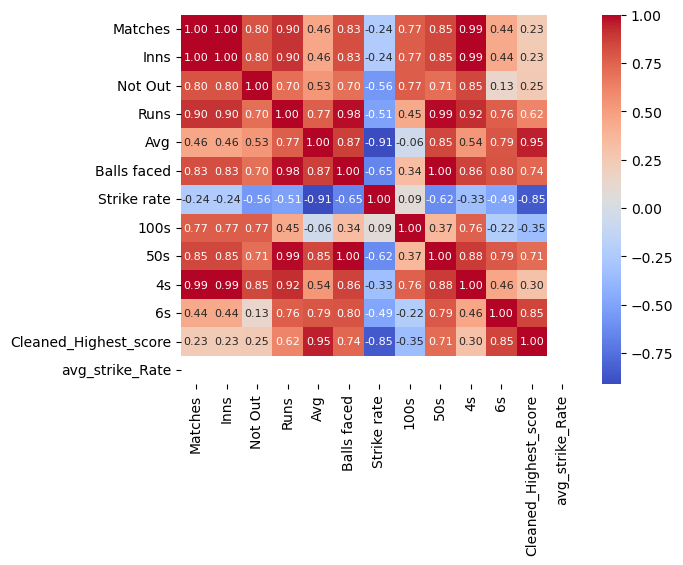

In [113]:
sns.heatmap(century_data_drop.corr(),annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.show()

### Q11. Players who scored atleast 4 half centuries in this season

In [25]:
Ipl_df[(Ipl_df['50s']> 3)]['Player']

0             KL Rahul
1       Shikhar Dhawan
2         David Warner
4         Ishan Kishan
5         Quinton Kock
6     Suryakumar Yadav
7     Devdutt Padikkal
9         ABD Villiers
10       Faf Duplessis
Name: Player, dtype: object

### Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.

In [26]:
Ipl_df[(Ipl_df['4s']> 45) & (Ipl_df['6s']>10)]['Player']

0            KL Rahul
1      Shikhar Dhawan
2        David Warner
5        Quinton Kock
6    Suryakumar Yadav
Name: Player, dtype: object

### Q13. Plot a histogram of number of matches played in a season by players.

In [27]:
hist_data = Ipl_df.groupby(['Matches']).size()

hist_data

Matches
1      6
2      7
3     10
4      3
5      9
6      5
7     10
8      6
9      6
10     6
11     5
12     8
13     7
14    22
15    10
16     9
17     4
dtype: int64

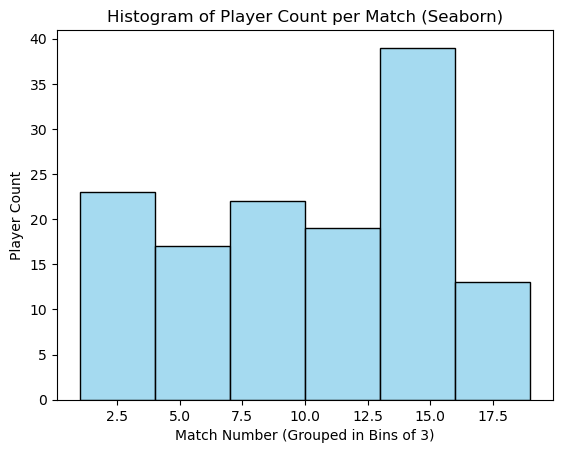

In [28]:
hist_data = Ipl_df.groupby(['Matches']).size()

hist_df = hist_data.reset_index()
hist_df.columns = ['Matches', 'Player Count']


sns.histplot(data=hist_df, x='Matches',weights='Player Count',bins=range(min(hist_df['Matches']), max(hist_df['Matches']) + 3, 3),color='skyblue')


plt.xlabel('Match Number (Grouped in Bins of 3)')
plt.ylabel('Player Count')
plt.title('Histogram of Player Count per Match (Seaborn)')
plt.show()


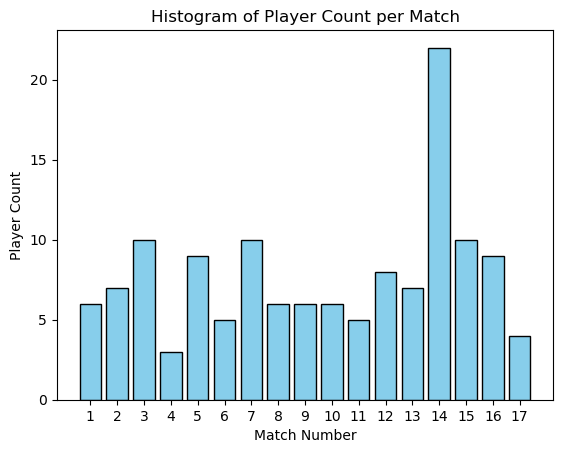

In [29]:
# Plotting the bar
plt.bar(hist_data.index, hist_data.values, color='skyblue', edgecolor='black')
plt.xlabel('Match Number')
plt.ylabel('Player Count')
plt.title('Histogram of Player Count per Match')
plt.xticks(hist_data.index)  # Ensures match numbers are displayed on the x-axis
plt.show()


### Q14. Plot the histogram of balls faced by players.

In [30]:
Ipl_df[['Player','Balls faced']]

,Player,Balls faced
0,KL Rahul,518
1,Shikhar Dhawan,427
2,David Warner,407
3,Shreyas Iyer,421
4,Ishan Kishan,354
...,...,...
128,Khaleel Ahmed,2
129,Arshdeep Singh,3
130,Daniel Sams,2
131,Shreevats Goswami,4


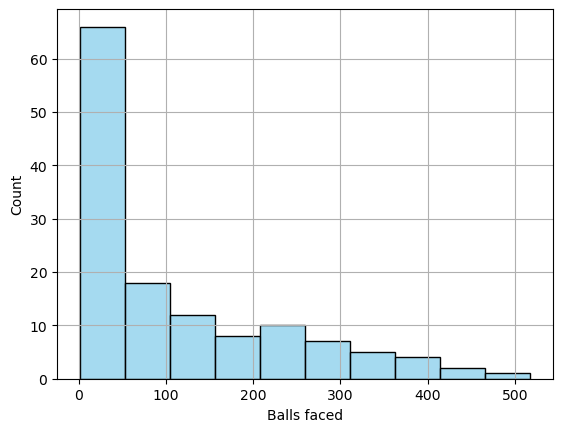

In [31]:
sns.histplot(data=Ipl_df,x='Balls faced',bins=10,color='skyblue')
plt.grid(True)
plt.show()

### Q15. Top 10 players with most runs in a season.

In [32]:
most_runs_df = Ipl_df.sort_values(by=['Runs'],ascending=False)
most_runs_df[['Player','Runs']].head(10)

,Player,Runs
0,KL Rahul,670
1,Shikhar Dhawan,618
2,David Warner,548
3,Shreyas Iyer,519
4,Ishan Kishan,516
5,Quinton Kock,503
6,Suryakumar Yadav,480
7,Devdutt Padikkal,473
8,Virat Kohli,466
9,ABD Villiers,454


### Q16. Print the players who played the match but didn't get the batting.

In [33]:
Ipl_df[Ipl_df['Runs']==0][['Player','Runs']]

,Player,Runs
124,Mitchell Marsh,0
125,Umesh Yadav,0
126,Bhuvneshwar Kumar,0
127,Sheldon Cottrell,0
128,Khaleel Ahmed,0
129,Arshdeep Singh,0
130,Daniel Sams,0
131,Shreevats Goswami,0
132,Trent Boult,0


### Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage.

In [34]:
Ipl_df['Total_run_of_4and6'] = round((((Ipl_df['4s']*4) + (Ipl_df['6s']*6)) / Ipl_df['Runs'])* 100,2)

In [35]:
Ipl_df.sort_values(by=['Total_run_of_4and6'],ascending=False)[['Player','Total_run_of_4and6']].head(5)

,Player,Total_run_of_4and6
109,Andrew Tye,100.00
48,Andre Russell,76.92
74,Chris Morris,76.47
29,Hardik Pandya,73.31
47,Sunil Narine,72.73


### Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).

In [36]:
Ipl_df['Not_Out_Percentage'] = round((Ipl_df['Not Out'] / Ipl_df['Inns']) * 100,2)

In [37]:
Ipl_df.sort_values(by=['Not_Out_Percentage'],ascending=False)[['Player','Not_Out_Percentage']].head(5)

,Player,Not_Out_Percentage
122,Shahbaz Ahmed,100.0
97,Mohammad Nabi,100.0
114,T Natarajan,100.0
116,Rahul Chahar,100.0
113,Dhawal Kulkarni,100.0


### Q19. Create visualization of top 10 players with highest number of sixes.

In [59]:
highest_6 = Ipl_df.sort_values(by=['6s'],ascending=False).head(10)
highest_6_drop = highest_6.drop(['Jersey No','Player_FirstName','Player_SecondName','Highest Score'],axis=1)
highest_6_drop = highest_6_drop.reset_index(drop=True)


In [60]:
highest_6_drop

,Player,Matches,Inns,Not Out,Runs,Avg,Balls faced,Strike rate,100s,50s,4s,6s,Cleaned_Highest_score,avg_strike_Rate,Total_run_of_4and6,Not_Out_Percentage
0,Ishan Kishan,14,13,4,516,57.33,354,145.76,0,4,36,30,99,107.36,62.79,30.77
1,Sanju Samson,14,14,1,375,28.84,236,158.89,0,3,21,26,85,107.36,64.00,7.14
2,Hardik Pandya,14,13,5,281,35.12,157,178.98,0,1,14,25,60,107.36,73.31,38.46
3,Nicholas Pooran,14,14,4,353,35.30,208,169.71,0,2,23,25,77,107.36,68.56,28.57
4,Eoin Morgan,14,14,4,418,41.80,302,138.41,0,1,32,24,68,107.36,65.07,28.57
5,ABD Villiers,15,14,4,454,45.40,286,158.74,0,5,33,23,73,107.36,59.47,28.57
6,Chris Gayle,7,7,0,288,41.14,210,137.14,0,3,15,23,99,107.36,68.75,0.00
7,KL Rahul,14,14,2,670,55.83,518,129.34,1,5,58,23,132,107.36,55.22,14.29
8,Kieron Pollard,16,12,7,268,53.60,140,191.42,0,1,15,22,60,107.36,71.64,58.33
9,Quinton Kock,16,16,2,503,35.92,358,140.50,0,4,46,22,78,107.36,62.82,12.50


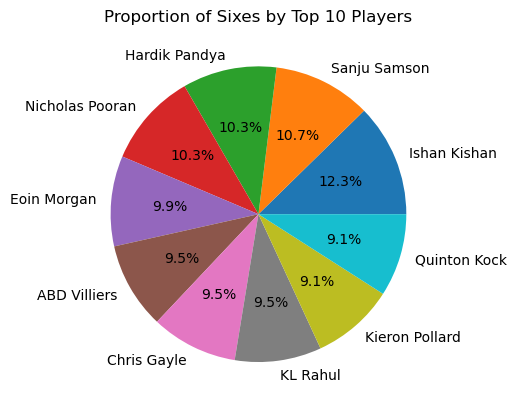

In [61]:
plt.pie(highest_6['6s'], labels=highest_6['Player'], autopct='%1.1f%%')
plt.title('Proportion of Sixes by Top 10 Players')
plt.show()


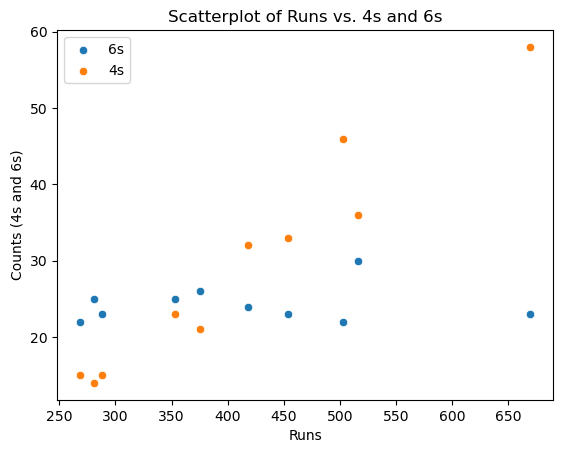

In [69]:
sns.scatterplot(highest_6_drop,x='Runs',y='6s',label='6s',legend='auto')
sns.scatterplot(highest_6_drop,x='Runs',y='4s',label='4s',legend='auto')
plt.xlabel('Runs')
plt.ylabel('Counts (4s and 6s)')
plt.title('Scatterplot of Runs vs. 4s and 6s')
plt.show()

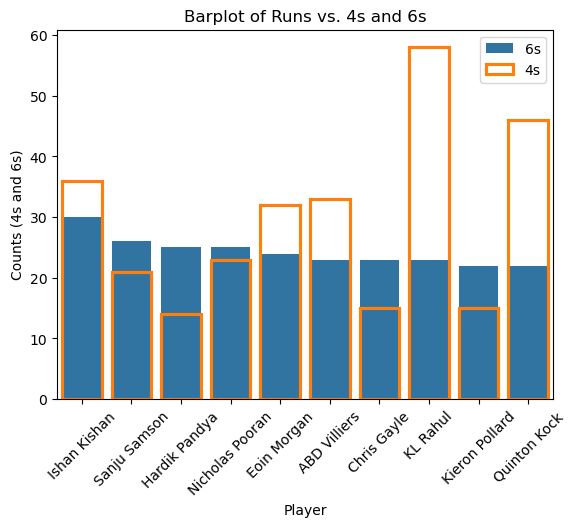

In [75]:
sns.barplot(highest_6_drop,x='Player',y='6s',fill=True,label='6s')
sns.barplot(highest_6_drop,x='Player',y='4s',fill=False,label='4s')
plt.xlabel('Player')
plt.ylabel('Counts (4s and 6s)')
plt.title('Barplot of Runs vs. 4s and 6s')
plt.xticks(rotation=45)
plt.show()

### Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables.

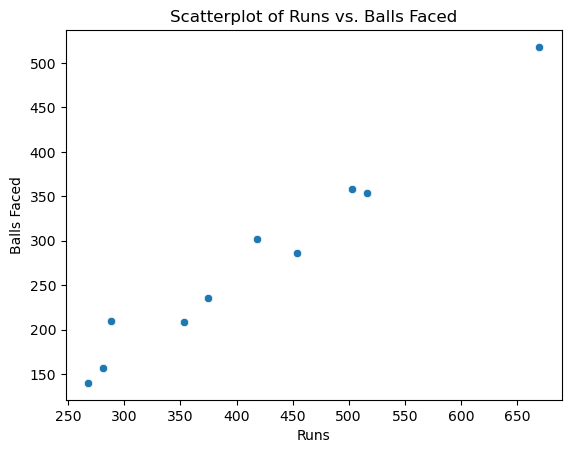

In [76]:
sns.scatterplot(highest_6_drop,x='Runs',y='Balls faced',legend='auto')
plt.xlabel('Runs')
plt.ylabel('Balls Faced')
plt.title('Scatterplot of Runs vs. Balls Faced')
plt.show()

In [85]:
correlation = Ipl_df['Runs'].corr(Ipl_df['Balls faced'])
print(f"Correlation Coefficient: {correlation}")


Correlation Coefficient: 0.9899480233860845


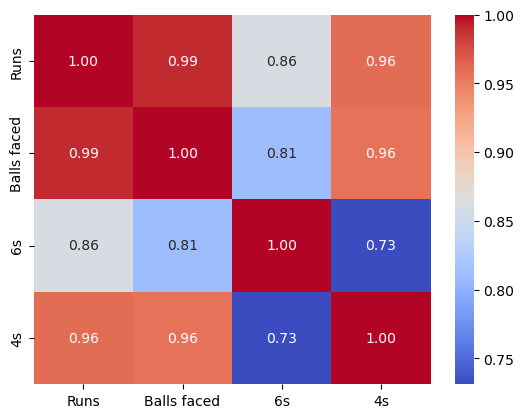

In [86]:
sns.heatmap(Ipl_df[['Runs', 'Balls faced','6s','4s']].corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
## correlation between Runs and Balls Faced shows highly positive relation.